In [ ]:
!pip install python-pptx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 17.8 MB/s eta 0:00:00


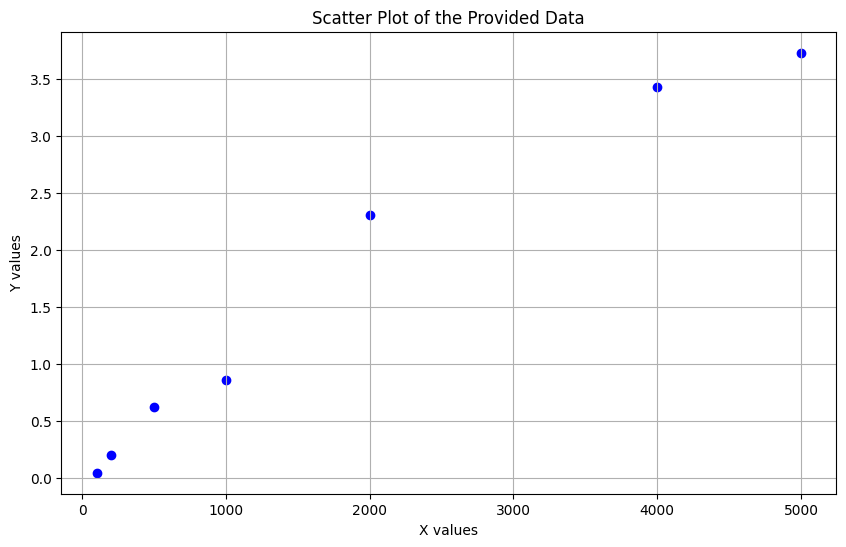

In [1]:
import matplotlib.pyplot as plt

# Data provided
data = [
    (100, 0.0479),
    (200, 0.2028),
    (500, 0.6262),
    (1000, 0.8582),
    (2000, 2.3060),
    (4000, 3.4323),
    (5000, 3.7301)
]

# Separating the data into two lists for plotting
x, y = zip(*data)

# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue')
plt.title('Scatter Plot of the Provided Data')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.grid(True)
plt.show()

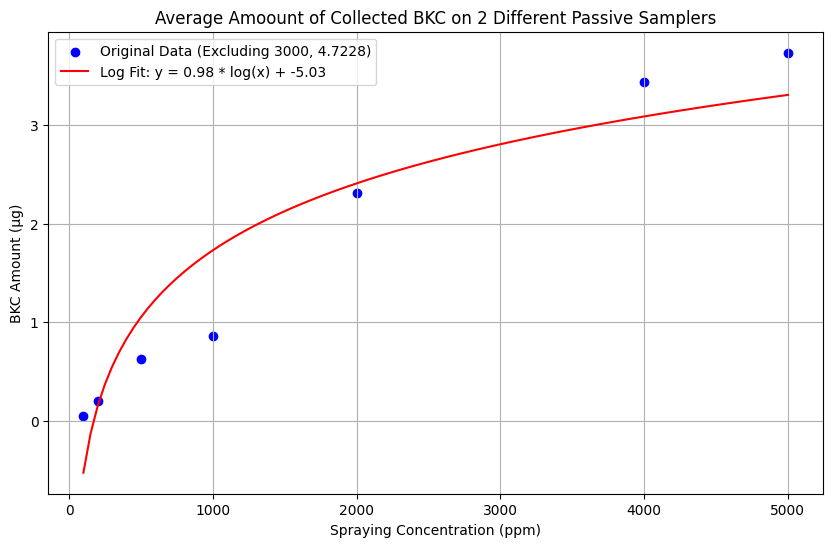

In [6]:
import numpy as np
from scipy.optimize import curve_fit

# # Excluding the point (3000, 4.7228)
# filtered_data = [(x_val, y_val) for x_val, y_val in data if x_val != 3000 or y_val != 4.7228]

# # Separating the filtered data
# x_filtered, y_filtered = zip(*filtered_data)

# Defining the logarithmic function to fit
def log_fit(x, a, b):
    return a * np.log(x) + b

# Performing the curve fitting
params, _ = curve_fit(log_fit, x, y)

# Parameters a and b
a, b = params

# Generating fitted values for plotting
x_fit = np.linspace(min(x), max(x), 100)
y_fit = log_fit(x_fit, a, b)

# Plotting the original data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Original Data (Excluding 3000, 4.7228)')
plt.plot(x_fit, y_fit, color='red', label=f'Log Fit: y = {a:.2f} * log(x) + {b:.2f}')
plt.title('Average Amoount of Collected BKC on 2 Different Passive Samplers')
plt.xlabel('Spraying Concentration (ppm)')
plt.ylabel('BKC Amount (μg)')
plt.legend()
plt.grid(True)
#plt.show()

plt.savefig('/content/drive/MyDrive/ODE/240112.png', dpi=300)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
# Define the exponential function for curve fitting
def exp_func(t, a, b):
    return a * np.exp(b * t)

In [ ]:
t_data = np.array([0.001, 2, 3])
y_data = np.array([0, 136.67, 284.67])
t_values_extended = np.linspace(0, 4, 100)

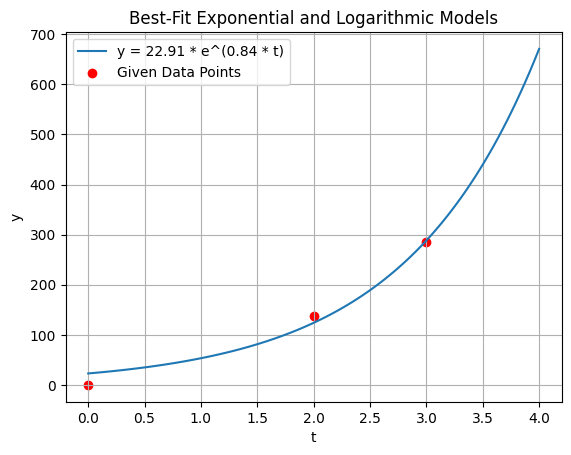

In [ ]:
# Fit the exponential model using curve fitting
params_exp, _ = curve_fit(exp_func, t_data, y_data)
a_best_fit_exp, b_best_fit_exp = params_exp

# Calculate the corresponding y values for the best-fit exponential model
y_values_exp_extended = a_best_fit_exp * np.exp(b_best_fit_exp * t_values_extended)

# Plot both the best-fit exponential and logarithmic models along with the given data points
plt.plot(t_values_extended, y_values_exp_extended, label=f"y = {a_best_fit_exp:.2f} * e^({b_best_fit_exp:.2f} * t)")
plt.scatter(t_data, y_data, color='red', label="Given Data Points")
plt.xlabel('t')
plt.ylabel('y')
plt.title('Best-Fit Exponential and Logarithmic Models')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def custom_exp_func(t, a, b, c):
    return a * np.exp(-b * (t - 4)) + c

<ipython-input-7-1a78bfd3258b>:2: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * (t - 4)) + c


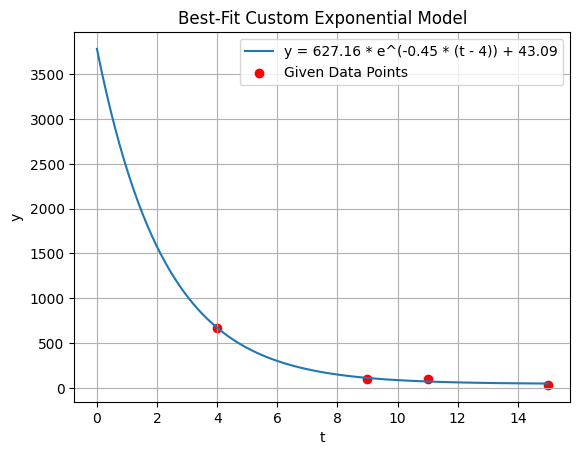

In [ ]:
# Additional data points
t_data_new = np.array([9, 11, 15])
y_data_new = np.array([95.67, 100.33, 32.33])

# Adding the derived point from the previously fitted exponential model
t_data_new = np.append(t_data_new, 4)
y_data_new = np.append(y_data_new, a_best_fit_exp * np.exp(b_best_fit_exp * 4))

# Fit the custom exponential model using curve fitting
params_custom_exp, _ = curve_fit(custom_exp_func, t_data_new, y_data_new)
a_best_fit_custom_exp, b_best_fit_custom_exp, c_best_fit_custom_exp = params_custom_exp

# Define the extended range of t values for visualization
t_values_custom_exp = np.linspace(0, 15, 100)

# Calculate the corresponding y values for the best-fit custom exponential model
y_values_custom_exp = a_best_fit_custom_exp * np.exp(-b_best_fit_custom_exp * (t_values_custom_exp - 4)) + c_best_fit_custom_exp

# Plot the best-fit custom exponential model along with the given data points
plt.plot(t_values_custom_exp, y_values_custom_exp, label=f"y = {a_best_fit_custom_exp:.2f} * e^(-{b_best_fit_custom_exp:.2f} * (t - 4)) + {c_best_fit_custom_exp:.2f}")
plt.scatter(t_data_new, y_data_new, color='red', label="Given Data Points")
plt.xlabel('t')
plt.ylabel('y')
plt.title('Best-Fit Custom Exponential Model')
plt.legend()
plt.grid(True)
plt.show()

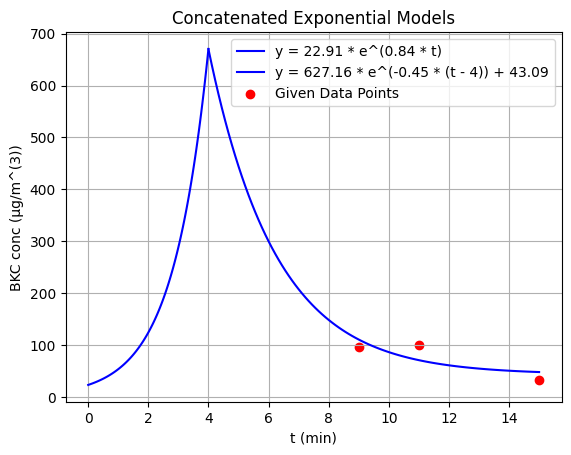

In [ ]:
# Define the specific range of t values for visualization (t=4 to t=15)
t_values_custom_exp_specific = np.linspace(4, 15, 100)

# Calculate the corresponding y values for the best-fit custom exponential model in the specific range
y_values_custom_exp_specific = a_best_fit_custom_exp * np.exp(-b_best_fit_custom_exp * (t_values_custom_exp_specific - 4)) + c_best_fit_custom_exp

# Define the range of t values for the previously fitted exponential model (t=0 to t=4)
t_values_exp_previous = np.linspace(0, 4, 100)

# Calculate the corresponding y values for the previously fitted exponential model
y_values_exp_previous = a_best_fit_exp * np.exp(b_best_fit_exp * t_values_exp_previous)

# Plot the previously fitted exponential model (t=0 to t=4)
plt.plot(t_values_exp_previous, y_values_exp_previous, label=f"y = {a_best_fit_exp:.2f} * e^({b_best_fit_exp:.2f} * t)", color='blue')

# Plot the best-fit custom exponential model (t=4 to t=15)
plt.plot(t_values_custom_exp_specific, y_values_custom_exp_specific, label=f"y = {a_best_fit_custom_exp:.2f} * e^(-{b_best_fit_custom_exp:.2f} * (t - 4)) + {c_best_fit_custom_exp:.2f}", color='blue')

# Include the given data points
plt.scatter(t_data_new[:-1], y_data_new[:-1], color='red', label="Given Data Points")

plt.xlabel('t (min)')
plt.ylabel('BKC conc (μg/m^(3))')
plt.title('Concatenated Exponential Models')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
t_data

array([1.e-03, 2.e+00, 3.e+00])

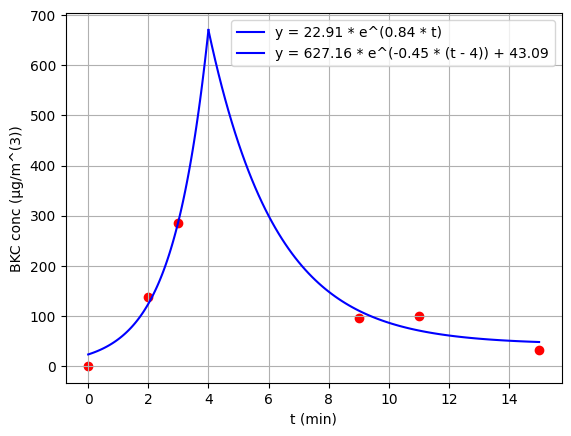

In [ ]:
# Include the previous data points
t_data_combined = np.append(t_data_new[:-1], [0.001, 2, 3])
y_data_combined = np.append(y_data_new[:-1], [0, 136.67, 284.67])

# Plot the previously fitted exponential model (t=0 to t=4)
plt.plot(t_values_exp_previous, y_values_exp_previous, label=f"y = {a_best_fit_exp:.2f} * e^({b_best_fit_exp:.2f} * t)", color='blue')

# Plot the best-fit custom exponential model (t=4 to t=15)
plt.plot(t_values_custom_exp_specific, y_values_custom_exp_specific, label=f"y = {a_best_fit_custom_exp:.2f} * e^(-{b_best_fit_custom_exp:.2f} * (t - 4)) + {c_best_fit_custom_exp:.2f}", color='blue')

# Include all the given data points
plt.scatter(t_data_combined, y_data_combined, color='red')

plt.xlabel('t (min)')
plt.ylabel('BKC conc (μg/m^(3))')
#plt.title('Concatenated Exponential Models')
plt.legend()
plt.grid(True)
plt.show()

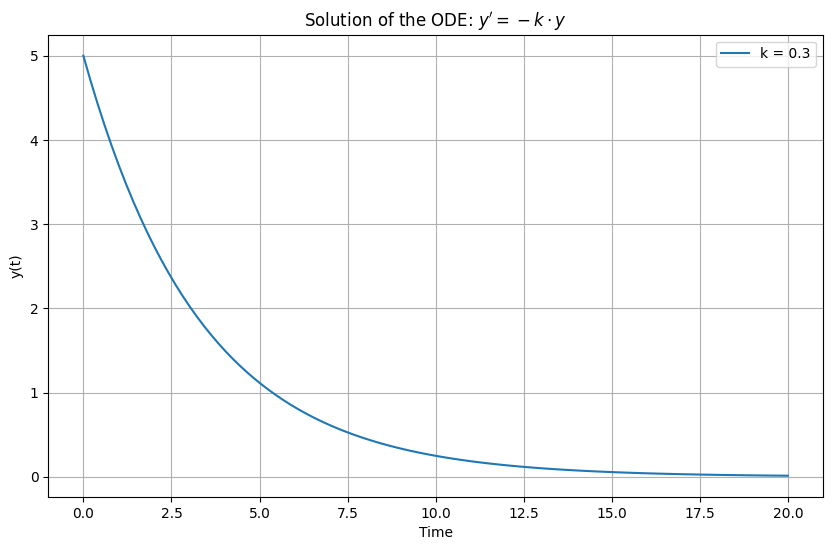

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE: dy/dt = -k*y
def model(y, t, k):
    dydt = -k * y
    return dydt

# Initial condition
y0 = 5

# Time points at which to solve
t = np.linspace(0, 20, 100)

# Parameter value
k = 0.3

# Solve ODE using odeint
y = odeint(model, y0, t, args=(k,))

# Plot the solution
plt.figure(figsize=(10, 6))
plt.plot(t, y, label=f'k = {k}')
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.title('Solution of the ODE: $y\' = -k \cdot y$')
plt.legend()
plt.grid(True)
plt.show()

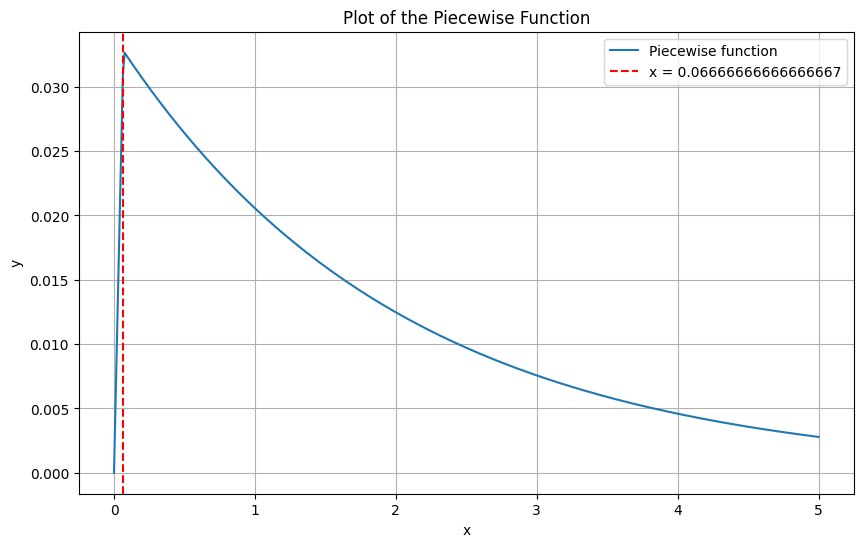

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define the parameters
A = 1  # Assuming A = 1 for demonstration, can be any other value
b = 0.5  # Assuming b = 0.5 for demonstration, can be any other value
xr = 4/60  # Assuming xr = 2 for demonstration, can be any other value

# Define the range for x
x = np.linspace(0, 5, 400)  # Range from 0 to 5 with 400 points

# Define the piecewise function
y = np.piecewise(x, [x < xr, x >= xr],
                 [lambda x: A * (1 - np.exp(-b * x)),
                  lambda x: A * (1 - np.exp(-b * xr)) * np.exp(-b * (x - xr))])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Piecewise function')
plt.axvline(x=xr, color='r', linestyle='--', label=f'x = {xr}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of the Piecewise Function')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from scipy.integrate import quad

# Define the piecewise function for integration
def piecewise_function(x, A, b, xr):
    if x < xr:
        return A * (1 - np.exp(-b * x))
    else:
        return A * (1 - np.exp(-b * xr)) * np.exp(-b * (x - xr))

# Integration parameters
A = 1  # Example value, can be changed
b = 0.5  # Example value, can be changed
xr = 4/60  # Example value, can be changed
x_lower = 0  # Lower limit of integration
x_upper = 5  # Upper limit of integration

# Perform the integration
integral, _ = quad(piecewise_function, x_lower, x_upper, args=(A, b, xr))

integral

0.061102105811039184

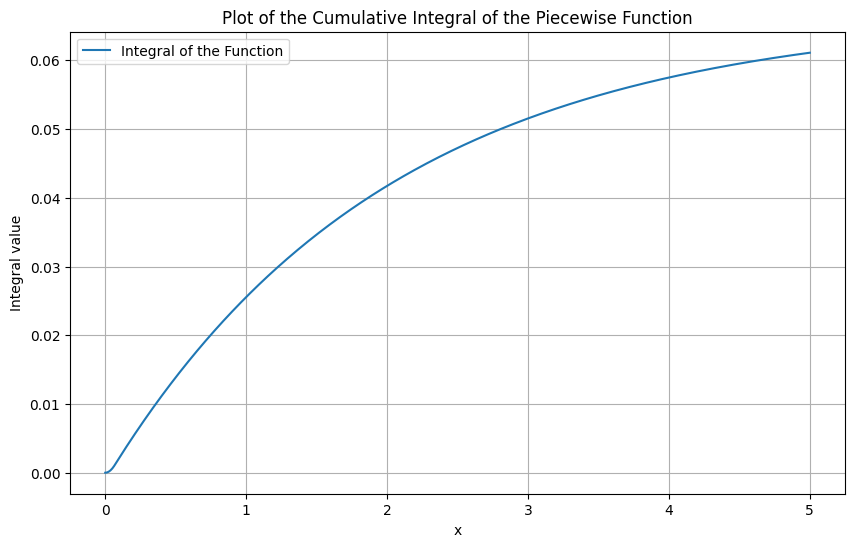

In [ ]:
# Define the range for x for plotting
x_values = np.linspace(0, 5, 400)  # Range from 0 to 5 with 400 points

# Function to calculate integral up to a given x
def integral_up_to_x(x, A, b, xr):
    integral, _ = quad(piecewise_function, x_lower, x, args=(A, b, xr))
    return integral

# Calculate the integral values
integral_values = [integral_up_to_x(x, A, b, xr) for x in x_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_values, integral_values, label='Integral of the Function')
plt.xlabel('x')
plt.ylabel('Integral value')
plt.title('Plot of the Cumulative Integral of the Piecewise Function')
plt.legend()
plt.grid(True)
plt.show()

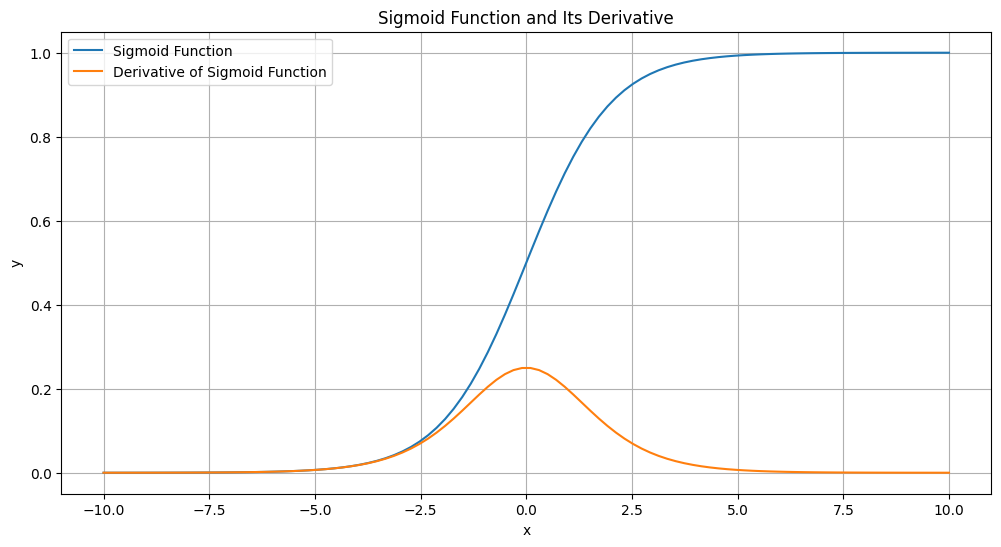

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# Example usage
x = np.linspace(-10, 10, 100)
y = sigmoid(x)
y_derivative = sigmoid_derivative(x)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Sigmoid Function')
plt.plot(x, y_derivative, label='Derivative of Sigmoid Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sigmoid Function and Its Derivative')
plt.legend()
plt.grid(True)
plt.show()

σ
′
 (x)=σ(x)(1−σ(x))

In [ ]:
import pandas as pd

# Load the data from the uploaded file
file_path = '/content/drive/MyDrive/ODE/data fitting example.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data
data.head()

,time(hr),BKC amount (mg/m3),BKC amount -front- (mg/m3),Accumulated BKC amount (mg/m3 * hr),Accumulated BKC average amount (mg/m3 * hr)
0,0.033333,0.170530,0.769800,0.093397,2.801915
1,0.050000,0.377756,1.241213,0.216826,4.336514
2,0.066667,0.511924,1.640138,0.300951,4.514270
3,0.083333,0.372977,1.678779,0.488090,5.857078
4,0.100000,0.167063,1.323992,0.601291,6.012913


In [ ]:
data['BKC amount (mg/m3)'] = data['BKC amount (mg/m3)']/ 1000000
data.head()

,time(hr),BKC amount (mg/m3)
0,0.033333,0.170530
1,0.050000,0.377756
2,0.066667,0.511924
3,0.083333,0.372977
4,0.100000,0.167063


In [ ]:
import numpy as np
from scipy.optimize import curve_fit

# Extract x and y data
x_data = data['time(hr)'].values
y_data = data['BKC amount (mg/m3)'].values
x_data, y_data

# Define the fitting function
def fitting_function(x, a, b):
    xr = 5 / 60  # xr value
    y = np.empty_like(x)

    # Apply the fitting equation
    for i, xi in enumerate(x):
        if xi <= xr:
            y[i] = a / b * (1 - np.exp(-b * xi))
        else:
            y[i] = a / b * (1 - np.exp(-b * xr)) * np.exp(-b * (xi - xr))
    return y

# Perform the curve fitting
popt, pcov = curve_fit(fitting_function, x_data, y_data, p0=[1, 1])

# Extract the fitted parameters a and b
a_fit, b_fit = popt
a_fit, b_fit


(array([0.03333333, 0.05      , 0.06666667, 0.08333333, 0.1       ,
        0.11666667, 0.13333333, 0.16666667, 0.2       ]),
 array([0.17052977, 0.37775594, 0.51192386, 0.37297688, 0.16706281,
        0.058431  , 0.01860974, 0.00750535, 0.00069953]))

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

# Extract x and y data
x_data = data['time(hr)'].values
y_data = data['Accumulated BKC average amount (mg/m3 * hr)'].values
x_data[:-1], y_data[:-1]

# omit last values

# # Define the fitting function
# def fitting_function(x, a, b):
#     xr = 5 / 60  # xr value
#     y = np.empty_like(x)

#     # Apply the fitting equation
#     for i, xi in enumerate(x):
#         if xi <= xr:
#             y[i] = a / b * (1 - np.exp(-b * xi))
#         else:
#             y[i] = a / b * (1 - np.exp(-b * xr)) * np.exp(-b * (xi - xr))
#     return y

# # Perform the curve fitting
# popt, pcov = curve_fit(fitting_function, x_data, y_data, p0=[1, 1])

# # Extract the fitted parameters a and b
# a_fit, b_fit = popt
# a_fit, b_fit

(array([0.03333333, 0.05      , 0.06666667, 0.08333333, 0.1       ,
        0.11666667, 0.13333333, 0.16666667]),
 array([2.80191519, 4.33651419, 4.51426973, 5.85707787, 6.01291292,
        6.46137356, 4.99694641, 4.86123931]))

In [ ]:
from scipy.optimize import curve_fit
import numpy as np

# Extracting the relevant data
x_data = data['time(hr)'].values
y_data = data['Accumulated BKC average amount (mg/m3 * hr)'].values
x_data = x_data[:-1]
y_data = y_data[:-1]

# Define the piecewise function
def piecewise_func(x, a, b, xr):
    return np.where(x <= xr,
                    (a/b) * (x - ((1 - np.exp(-b * x))/b)) * (1/x),
                    (a/b) * (xr - ((1 - np.exp(-b * xr)/b)) * ((1 - np.exp(-b * xr)*(np.exp(-b * x) - np.exp(-b * xr))/b))) * (1/x))

# Initialize best fit parameters and the corresponding error
best_params = None
lowest_error = float('inf')

# Iterate over a range of possible xr values
for xr in np.linspace(4/60, 5/60, 100):  # Fine-grained search within the interval
    try:
        # Fit the model to the data
        params, _ = curve_fit(lambda x, a, b: piecewise_func(x, a, b, xr), x_data, y_data, p0=[1, 1])

        # Calculate the sum of squared errors
        fitted_values = piecewise_func(x_data, params[0], params[1], xr)
        error = np.sum((y_data - fitted_values) ** 2)

        # Update best parameters if this fit is better
        if error < lowest_error:
            best_params = (params[0], params[1], xr)
            lowest_error = error
    except RuntimeError:
        # In case the fitting fails for a specific set of parameters
        continue

# Best parameters and the corresponding error
best_params, lowest_error

((125.59899975222311, 0.9955883275065349, 0.08333333333333333),
 17.491448288894006)

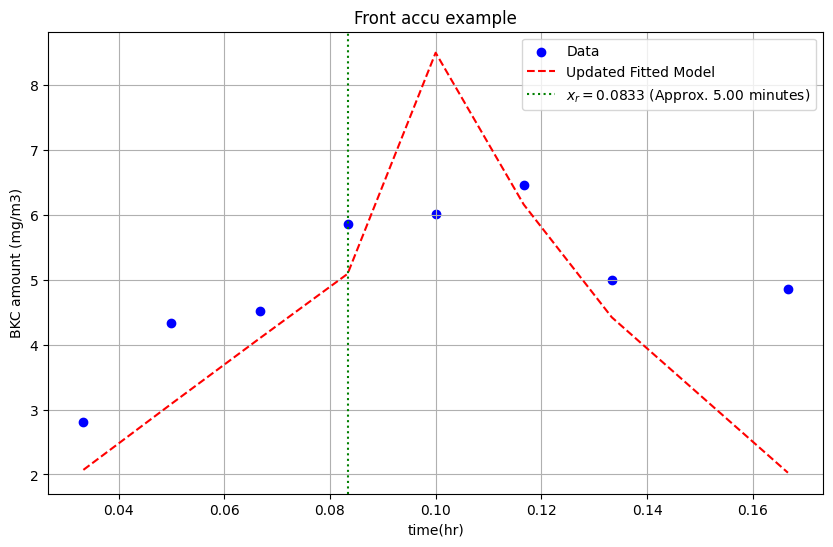

In [ ]:
# Unpack the updated best parameters
a_best_updated, b_best_updated, xr_best_updated = best_params

# Generate fitted values with updated parameters
fitted_y_updated = piecewise_func(x_data, a_best_updated, b_best_updated, xr_best_updated)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE, MAE, and R²
rmse = np.sqrt(mean_squared_error(y_data, fitted_y_updated))
mae = mean_absolute_error(y_data, fitted_y_updated)
r_squared = r2_score(y_data, fitted_y_updated)

# Sum of Squared Errors (SSE) is already calculated as lowest_error_updated
sse = lowest_error

# Plotting with updated fit
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Data', color='blue')
plt.plot(x_data, fitted_y_updated, label='Updated Fitted Model', color='red', linestyle='--')
plt.axvline(x=xr_best_updated, color='green', linestyle=':', label=f'$x_r = {xr_best_updated:.4f}$ (Approx. {xr_best_updated*60:.2f} minutes)')

plt.title('Front accu example')
plt.xlabel('time(hr)')
plt.ylabel('BKC amount (mg/m3)')
plt.legend()

# Split the fitted equation string into multiple lines
fitted_equation_lines = [
    f"Fitted Equation:",
    f"y = a/b(1-e^(-bx)) for x <= xr",
    f"y = a/b(1-e^(-bxr))e^(-b(x-xr)) for x > xr",
    f"where a = {a_best_updated:.2f}, b = {b_best_updated:.2f}"
]

figure_of_merit = [
    f"Figure_of_merit:",
    f"Coefficient of Determination (R²) = {r_squared:.2f}",
    f"Sum of Squared Errors (SSE) = {sse:.2f}"
]

N = 0.66
h = 1.5

Vs = (b_best_updated - N) * h

V = 105
wf = 500 * 1000000
Rs = (570/4) / (60*1000)

Fair = (a_best_updated * V) / (Rs * wf)

value = [
    f"Value of Vs and Fair:",
    f"Vs = {Vs:.2f} m/hr",
    f"Fair = {Fair:.4f}"
]

# Position the text in the upper right corner, below the legend
# plt.text(0.63, 0.68, '\n'.join(fitted_equation_lines), fontsize=9,
#          transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
# plt.text(0.63, 0.55, '\n'.join(figure_of_merit), fontsize=9,
#          transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
# plt.text(0.63, 0.42, '\n'.join(value), fontsize=9,
#         transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
#plt.savefig('/content/drive/MyDrive/ODE/bkc_front_example.png', dpi=300)
plt.show()



In [ ]:
r_squared

0.8748080795246969

In [ ]:
from pptx import Presentation
from pptx.util import Inches

# Create a presentation object
prs = Presentation()

# Add a slide with a title and content layout
slide_layout = prs.slide_layouts[1]  # 1 is a title and content layout
slide = prs.slides.add_slide(slide_layout)

# Add a title
title = slide.shapes.title
title.text = "My Presentation Slide"

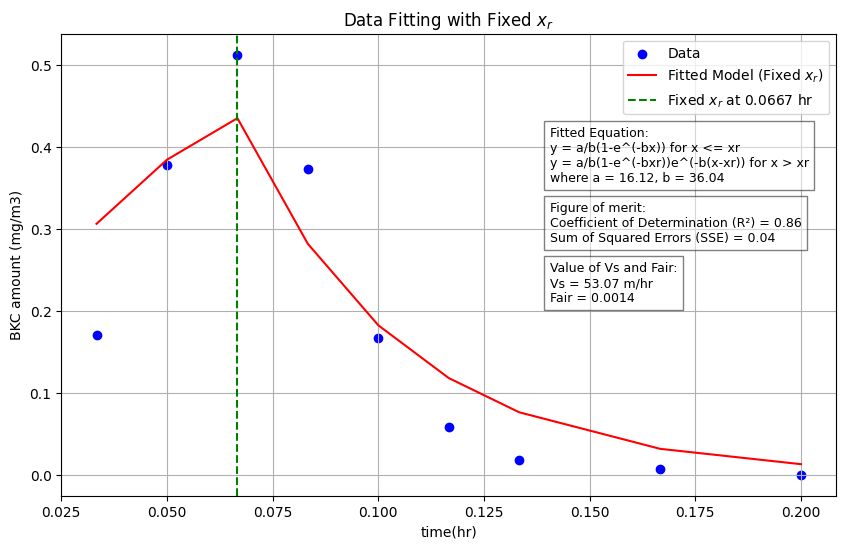

array([13.73453821, 26.02241094])

In [ ]:
# Fixed xr value
fixed_xr = 4/60

# Fit the model to the data with xr fixed
params_fixed_xr, _ = curve_fit(lambda x, a, b: piecewise_func(x, a, b, fixed_xr), x_data, y_data, p0=[1, 1])

# Generate fitted values with the new parameters
fitted_y_fixed_xr = piecewise_func(x_data, *params_fixed_xr, fixed_xr)

# Calculate RMSE, MAE, and R²
rmse_fixed_xr = np.sqrt(mean_squared_error(y_data, fitted_y_fixed_xr))
mae_fixed_xr = mean_absolute_error(y_data, fitted_y_fixed_xr)
r_squared_fixed_xr = r2_score(y_data, fitted_y_fixed_xr)

# Sum of Squared Errors (SSE) is already calculated as lowest_error_updated
sse_fixed_xr = np.sum((y_data - fitted_y_fixed_xr) ** 2)


# Plotting the fit with fixed xr
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Data', color='blue')
plt.plot(x_data, fitted_y_fixed_xr, label='Fitted Model (Fixed $x_r$)', color='red')
plt.axvline(x=fixed_xr, color='green', linestyle='--', label=f'Fixed $x_r$ at {fixed_xr:.4f} hr')

# Adding the box plot at a specific position
#plt.boxplot(y_data, positions=[max(x_data) * 1.05], widths=max(x_data) * 0.05, patch_artist=True)

plt.title('Data Fitting with Fixed $x_r$')
plt.xlabel('time(hr)')
plt.ylabel('BKC amount (mg/m3)')
plt.legend()

# Split the fitted equation string into multiple lines
fitted_equation_lines = [
    f"Fitted Equation:",
    f"y = a/b(1-e^(-bx)) for x <= xr",
    f"y = a/b(1-e^(-bxr))e^(-b(x-xr)) for x > xr",
    f"where a = {a_best_updated:.2f}, b = {b_best_updated:.2f}"
]

figure_of_merit = [
    f"Figure of merit:",
    f"Coefficient of Determination (R²) = {r_squared_fixed_xr:.2f}",
    f"Sum of Squared Errors (SSE) = {sse_fixed_xr:.2f}"
]

N = 0.66
h = 1.5

Vs = (b_best_updated - N) * h

V = 105
wf = 500 * 1000000
Rs = (570/4) / (60*1000)

Fair = (a_best_updated * V) / (Rs * wf)

value = [
    f"Value of Vs and Fair:",
    f"Vs = {Vs:.2f} m/hr",
    f"Fair = {Fair:.4f}"
]

# Position the text in the upper right corner, below the legend
plt.text(0.63, 0.68, '\n'.join(fitted_equation_lines), fontsize=9,
         transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.63, 0.55, '\n'.join(figure_of_merit), fontsize=9,
         transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.63, 0.42, '\n'.join(value), fontsize=9,
         transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.show()

params_fixed_xr

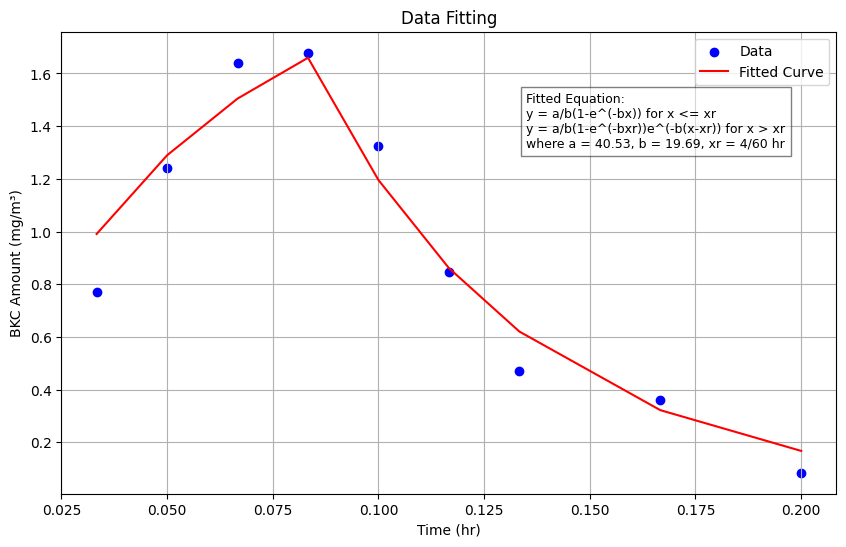

In [ ]:
import matplotlib.pyplot as plt

# Generate fitted y values using the fitting function
fitted_y = fitting_function(x_data, a_fit, b_fit)

# Modify the plot to position the fitted equation text in the upper right corner, below the legend
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Data', color='blue')
plt.plot(x_data, fitted_y, label='Fitted Curve', color='red')
plt.xlabel('Time (hr)')
plt.ylabel('BKC Amount (mg/m³)')
plt.title('Data Fitting')
plt.legend()

# Split the fitted equation string into multiple lines
fitted_equation_lines = [
    f"Fitted Equation:",
    f"y = a/b(1-e^(-bx)) for x <= xr",
    f"y = a/b(1-e^(-bxr))e^(-b(x-xr)) for x > xr",
    f"where a = {a_fit:.2f}, b = {b_fit:.2f}, xr = 4/60 hr"
]

# Position the text in the upper right corner, below the legend
plt.text(0.6, 0.75, '\n'.join(fitted_equation_lines), fontsize=9,
         transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

plt.grid(True)
plt.show()

In [ ]:
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN

# Create a presentation object
prs = Presentation()

# Add a slide with a title and content layout
slide_layout = prs.slide_layouts[6]
slide = prs.slides.add_slide(slide_layout)

fitted_equation_lines_txt = [
    "Fitted Equation:",
    "y = a/b(1-e^(-bx)) for x <= xr",
    "y = a/b(1-e^(-bxr))e^(-b(x-xr)) for x > xr",
    f"where a = {a_best_updated:.2f}, b = {b_best_updated:.2f}",
    "Figure of merit:",
    f"Coefficient of Determination (R²) = {r_squared_fixed_xr:.2f}",
    f"Sum of Squared Errors (SSE) = {sse_fixed_xr:.2f}",
    "Value of Vs and Fair:",
    f"Vs = {Vs:.2f} m/hr",
    f"Fair = {Fair:.4f}"
]

fitted_equation_text = "\n".join(fitted_equation_lines_txt)

# Add a text box for the fitted equation text
left, top, width, height = Inches(0.5), Inches(1), Inches(4), Inches(3)
txBox = slide.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame
tf.text = fitted_equation_lines_txt[0]  # Set the first line of text

# Add the remaining lines
for line in fitted_equation_lines_txt[1:]:
    p = tf.add_paragraph()
    p.text = line
    p.font.size = Pt(12)
    p.alignment = PP_ALIGN.LEFT

# Insert the plot image
img_path = '/content/drive/MyDrive/ODE/bkc_front_example.png'
pic = slide.shapes.add_picture(img_path, left, top, height=height)

prs.save('/content/drive/MyDrive/ODE/bkc_front_example.pptx')

In [ ]:
from pptx import Presentation

# Create a presentation object
prs = Presentation()

# Add a slide with the desired layout
slide_layout = prs.slide_layouts[6]  # Adjust as necessary
slide = prs.slides.add_slide(slide_layout)

# Print out the available placeholders and their indices
for i, placeholder in enumerate(slide.placeholders):
    print(f"Placeholder {i}: {placeholder.placeholder_format.idx}, {placeholder.name}")